In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

C:\Users\simon\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\simon\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# https://covid19.who.int/data
# https://health.google.com/covid-19/open-data/raw-data
# 3 methods: k-means, regression, HMMS (used to be naive bayes)

In [5]:
# reading in COVID-19 datasets
dem_df = pd.read_csv('../data/demographics.csv')
eco_df = pd.read_csv('../data/economy.csv')
epi_df = pd.read_csv('../data/epidemiology.csv')
vac_df = pd.read_csv('../data/vaccinations.csv')
idx_df = pd.read_csv('../data/index.csv')

In [6]:
# viewing datasets
dem_df.head(3)

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0


In [7]:
eco_df.head(3)

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389


In [8]:
epi_df.head(3)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [9]:
vac_df.head(3)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
idx_df.head(3)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0


In [12]:
idx_df[['country_name']]

,country_name
0,Andorra
1,United Arab Emirates
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
22958,South Africa
22959,South Africa
22960,South Africa
22961,Zambia


In [13]:
idx_df.loc[idx_df['country_name'] == 'United States of America']

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
19557,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,US,USA,0
19558,US_AK,ChIJG8CuwJzfAFQRNduKqSde27w,Q797,geoId/02,US,United States of America,AK,Alaska,NaN,NaN,NaN,NaN,US,USA,1
19559,US_AK_02013,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,AK,Alaska,02013,Aleutians East,NaN,NaN,US,USA,2
19560,US_AK_02016,ChIJI9ivbI1Pg1cRg8d4nlGjGVU,Q185533,geoId/02016,US,United States of America,AK,Alaska,02016,Aleutians West,NaN,NaN,US,USA,2
19561,US_AK_02020,ChIJQT-zBHaRyFYR42iEp1q6fSU,Q39450,geoId/02020,US,United States of America,AK,Alaska,02020,Anchorage Municipality,NaN,NaN,US,USA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,US_WY_56037,ChIJEVZf4rRTWocRoqATF0f_rnA,Q484194,geoId/56037,US,United States of America,WY,Wyoming,56037,Sweetwater County,NaN,NaN,US,USA,2
22838,US_WY_56039,ChIJV3wGpVVrUlMR3m18oGf5rvk,Q488912,geoId/56039,US,United States of America,WY,Wyoming,56039,Teton County,NaN,NaN,US,USA,2
22839,US_WY_56041,ChIJR4w4T5CnUYcRvTPRgMmXumM,Q483973,geoId/56041,US,United States of America,WY,Wyoming,56041,Uinta County,NaN,NaN,US,USA,2
22840,US_WY_56043,ChIJIXR5_L9BS1MRLvs8KUxeZC8,Q112846,geoId/56043,US,United States of America,WY,Wyoming,56043,Washakie County,NaN,NaN,US,USA,2


In [14]:
# get the US data
us_epi_df = epi_df.loc[epi_df['location_key'] == 'US']
us_vac_df = vac_df.loc[vac_df['location_key'] == 'US']

In [15]:
us_ev_df = us_epi_df.merge(us_vac_df, on='date', how='inner')

In [16]:
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='date', ylabel='cumulative_confirmed'>

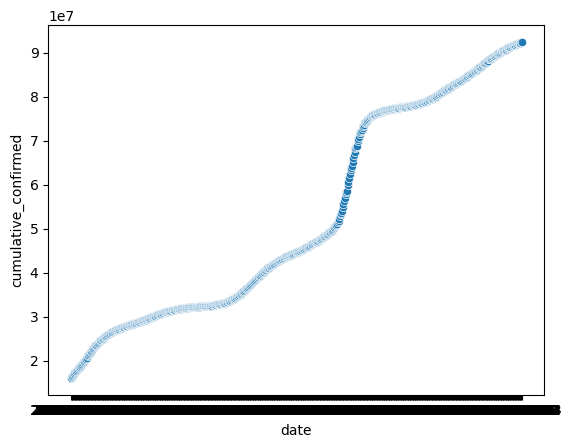

In [17]:
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
#ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

### Linear regression

In [ ]:
# use index as x, proxy for date, try to estimate y which is cumulative confirmed

In [18]:
indices = us_ev_df.index.values
covid_cases = us_ev_df['cumulative_confirmed'].values

In [19]:
def estimate_coefficients(x, y):
    num_dates = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    cross_dev = np.sum(y*x) - (num_dates * y_mean * x_mean)
    sum_sq_x = np.sum(x*x) - (num_dates * x_mean * x_mean)
  
    b1 = cross_dev / sum_sq_x
    b0 = y_mean - b1*x_mean
  
    return (b0, b1)

In [20]:
b0, b1 = estimate_coefficients(indices, covid_cases)
print(b0)
print(b1)

12503200.404420659
125748.74301270649


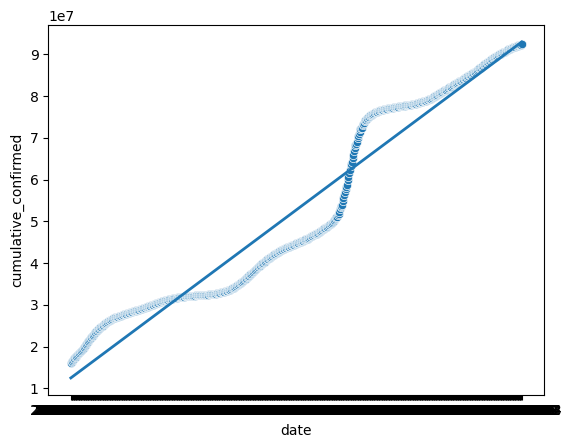

In [24]:
y_vals = indices * b1 + b0
# print(y)
sns.scatterplot(data=us_ev_df, x="date", y="cumulative_confirmed")
plt.plot(us_ev_df['date'], y_vals, linewidth=2)

### Below is mostly WHO data

In [55]:
covid_agg_df = pd.read_csv('../data/aggregated.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

KeyboardInterrupt: 

In [ ]:
print(covid_agg_df.shape)
covid_agg_df.head(3)

In [6]:
covid_global_df = pd.read_csv('../data/WHO-COVID-19-global-data.csv')

In [33]:
vacc_df = pd.read_csv('../data/vaccination-data.csv')

In [34]:
vacc_df.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-04-18,16826772.0,14719397,43.225,37.812,14005566,35.978,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,1072990.0,2.756
1,Albania,ALB,EURO,REPORTING,2023-03-19,3070468.0,1347054,106.700,47.332,1276432,44.851,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,395384.0,13.893
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2023-03-29,114706.0,46206,207.812,83.711,42479,76.959,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2023-02-26,156957.0,57904,203.100,76.012,53492,70.221,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43060.0,56.526


In [43]:
vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
219,United States of America,USA,AMRO,REPORTING,2023-04-07,666541020.0,267141226,201.37,80.707,227731485,68.801,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4.0,116145529.0,35.089


In [9]:
covid_global_df.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


In [8]:
covid_global_df.tail(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
285108,2023-04-17,ZW,Zimbabwe,AFRO,3,264613,0,5684
285109,2023-04-18,ZW,Zimbabwe,AFRO,0,264613,0,5684
285110,2023-04-19,ZW,Zimbabwe,AFRO,0,264613,0,5684


In [42]:
covid_us_df = covid_global_df.loc[covid_global_df['Country'] == 'United States of America']
covid_us_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
271878,2020-01-03,US,United States of America,AMRO,0,0,0,0
271879,2020-01-04,US,United States of America,AMRO,0,0,0,0
271880,2020-01-05,US,United States of America,AMRO,0,0,0,0
271881,2020-01-06,US,United States of America,AMRO,0,0,0,0
271882,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
273076,2023-04-15,US,United States of America,AMRO,0,102977396,0,1120529
273077,2023-04-16,US,United States of America,AMRO,0,102977396,0,1120529
273078,2023-04-17,US,United States of America,AMRO,0,102977396,0,1120529
273079,2023-04-18,US,United States of America,AMRO,0,102977396,0,1120529


In [44]:
vacc_df.loc[vacc_df['COUNTRY'] == 'United States of America']

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
219,United States of America,USA,AMRO,REPORTING,2023-04-07,666541020.0,267141226,201.37,80.707,227731485,68.801,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4.0,116145529.0,35.089


In [20]:
# get most_recent_date
most_recent_date = covid_global_df[['Date_reported']].max().iloc[0]

In [25]:
covid_global_mrd = covid_global_df.loc[covid_global_df['Date_reported'] == most_recent_date]
covid_global_mrd.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1202,2023-04-19,AF,Afghanistan,EMRO,0,213191,0,7885
2405,2023-04-19,AL,Albania,EURO,0,333897,0,3604
3608,2023-04-19,DZ,Algeria,AFRO,0,271644,0,6881


In [31]:
np.unique(covid_global_mrd[['WHO_region']])

array(['AFRO', 'AMRO', 'EMRO', 'EURO', 'Other', 'SEARO', 'WPRO'],
      dtype=object)

<AxesSubplot: xlabel='Cumulative_cases', ylabel='Cumulative_deaths'>

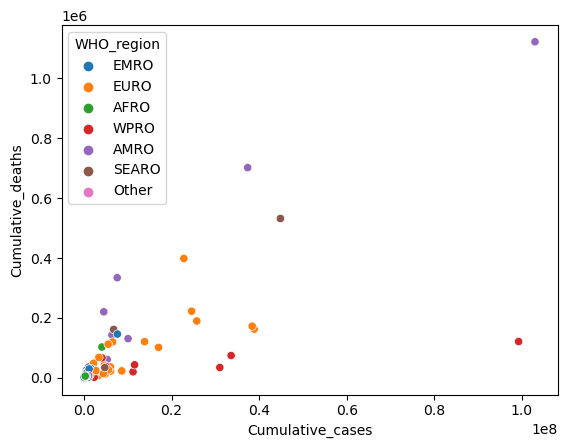

In [32]:
sns.scatterplot(data=covid_global_mrd, x="Cumulative_cases", y="Cumulative_deaths", hue='WHO_region')

In [ ]:
df.loc[df ['col1'] == value]